## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [16]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
from keras.regularizers import l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.9
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12, 0.0]

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
import itertools
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 34s 685us/step - loss: 269.3567 - accuracy: 0.2438 - val_loss: 147.1596 - val_accuracy: 0.2705
Epoch 2/10
50000/50000 [==============================] - 34s 674us/step - loss: 77.3666 - accuracy: 0.2725 - val_loss: 32.4106 - val_accuracy: 0.2390
Epoch 3/10
50000/50000 [==============================] - 33s 667us/step - loss: 22.7138 - accuracy: 0.1167 - val_loss: 15.2782 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 33s 657us/step - loss: 10.2728 - accuracy: 0.1002 - val_loss: 6.3137 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 35s 691us/step - loss: 4.5496 - accuracy: 0.1000 - val_loss: 3.4845 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 34s 686us/step - loss: 2.9421 - accuracy: 0.0995 - val_loss: 2.5571 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [=======================

Epoch 3/10
50000/50000 [==============================] - 29s 584us/step - loss: 5.8625 - accuracy: 0.3663 - val_loss: 5.8163 - val_accuracy: 0.3796
Epoch 4/10
50000/50000 [==============================] - 30s 594us/step - loss: 5.7772 - accuracy: 0.3844 - val_loss: 5.7383 - val_accuracy: 0.3920
Epoch 5/10
50000/50000 [==============================] - 29s 579us/step - loss: 5.7048 - accuracy: 0.3985 - val_loss: 5.6792 - val_accuracy: 0.4034
Epoch 6/10
50000/50000 [==============================] - 29s 588us/step - loss: 5.6402 - accuracy: 0.4107 - val_loss: 5.6093 - val_accuracy: 0.4086
Epoch 7/10
50000/50000 [==============================] - 29s 581us/step - loss: 5.5787 - accuracy: 0.4209 - val_loss: 5.5575 - val_accuracy: 0.4190
Epoch 8/10
50000/50000 [==============================] - 29s 577us/step - loss: 5.5200 - accuracy: 0.4271 - val_loss: 5.4980 - val_accuracy: 0.4290
Epoch 9/10
50000/50000 [==============================] - 29s 587us/step - loss: 5.4643 - accuracy: 0.4355

50000/50000 [==============================] - 27s 543us/step - loss: 5.5825 - accuracy: 0.3975 - val_loss: 5.5503 - val_accuracy: 0.4022
Epoch 6/10
50000/50000 [==============================] - 26s 528us/step - loss: 5.5168 - accuracy: 0.4082 - val_loss: 5.4940 - val_accuracy: 0.4047
Epoch 7/10
50000/50000 [==============================] - 27s 537us/step - loss: 5.4567 - accuracy: 0.4187 - val_loss: 5.4306 - val_accuracy: 0.4200
Epoch 8/10
50000/50000 [==============================] - 28s 555us/step - loss: 5.3986 - accuracy: 0.4271 - val_loss: 5.3770 - val_accuracy: 0.4227
Epoch 9/10
50000/50000 [==============================] - 27s 541us/step - loss: 5.3437 - accuracy: 0.4355 - val_loss: 5.3217 - val_accuracy: 0.4358
Epoch 10/10
50000/50000 [==============================] - 27s 535us/step - loss: 5.2910 - accuracy: 0.4421 - val_loss: 5.2721 - val_accuracy: 0.4429
Experiment with L1 = 0.000000, L2 = 0.010000
Model: "model_1"
______________________________________________________

50000/50000 [==============================] - 25s 501us/step - loss: 1.6623 - accuracy: 0.4226 - val_loss: 1.6520 - val_accuracy: 0.4229
Epoch 8/10
50000/50000 [==============================] - 25s 506us/step - loss: 1.6347 - accuracy: 0.4305 - val_loss: 1.6360 - val_accuracy: 0.4232
Epoch 9/10
50000/50000 [==============================] - 26s 513us/step - loss: 1.6089 - accuracy: 0.4395 - val_loss: 1.6115 - val_accuracy: 0.4339
Epoch 10/10
50000/50000 [==============================] - 26s 514us/step - loss: 1.5856 - accuracy: 0.4460 - val_loss: 1.5923 - val_accuracy: 0.4399
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______________________

50000/50000 [==============================] - 19s 388us/step - loss: 8.9380 - accuracy: 0.4126 - val_loss: 8.6553 - val_accuracy: 0.4153
Epoch 10/10
50000/50000 [==============================] - 19s 388us/step - loss: 8.3914 - accuracy: 0.4180 - val_loss: 8.1420 - val_accuracy: 0.4168
Experiment with L1 = 0.000000, L2 = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
________________________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 24s 471us/step - loss: 2.0896 - accuracy: 0.2557 - val_loss: 1.9525 - val_accuracy: 0.3148
Epoch 2/10
50000/50000 [==============================] - 22s 447us/step - loss: 1.8899 - accuracy: 0.3373 - val_loss: 1.8469 - val_accuracy: 0.3521
Epoch 3/10
50000/50000 [==============================] - 22s 445us/step - loss: 1.8133 - accuracy: 0.3634 - val_loss: 1.7925 - val_accuracy: 0.3663
Epoch 4/10
50000/50000 [==============================] - 25s 492us/step - loss: 1.7637 - accuracy: 0.3819 - val_loss: 1.7465 - val_accuracy: 0.3886
Epoch 5/10
50000/50000 [==============================] - 20s 399us/step - loss: 1.7253 - accuracy: 0.3960 - val_loss: 1.7141 - val_accuracy: 0.4026
Epoch 6/10
50000/50000 [==============================] - 20s 396us/step - loss: 1.6920 - accuracy: 0.4074 - val_loss: 1.6857 - val_accuracy: 0.4077
Epoch 7/10
50000/50000 [==============================] 

50000/50000 [==============================] - 17s 338us/step - loss: 1.8061 - accuracy: 0.3680 - val_loss: 1.7758 - val_accuracy: 0.3833
Epoch 4/10
50000/50000 [==============================] - 17s 342us/step - loss: 1.7554 - accuracy: 0.3835 - val_loss: 1.7301 - val_accuracy: 0.4005
Epoch 5/10
50000/50000 [==============================] - 17s 337us/step - loss: 1.7155 - accuracy: 0.3999 - val_loss: 1.7041 - val_accuracy: 0.4079
Epoch 6/10
50000/50000 [==============================] - 17s 336us/step - loss: 1.6834 - accuracy: 0.4108 - val_loss: 1.6710 - val_accuracy: 0.4122
Epoch 7/10
50000/50000 [==============================] - 14s 287us/step - loss: 1.6561 - accuracy: 0.4208 - val_loss: 1.6474 - val_accuracy: 0.4217
Epoch 8/10
50000/50000 [==============================] - 15s 292us/step - loss: 1.6294 - accuracy: 0.4309 - val_loss: 1.6221 - val_accuracy: 0.4327
Epoch 9/10
50000/50000 [==============================] - 14s 287us/step - loss: 1.6060 - accuracy: 0.4387 - val_loss

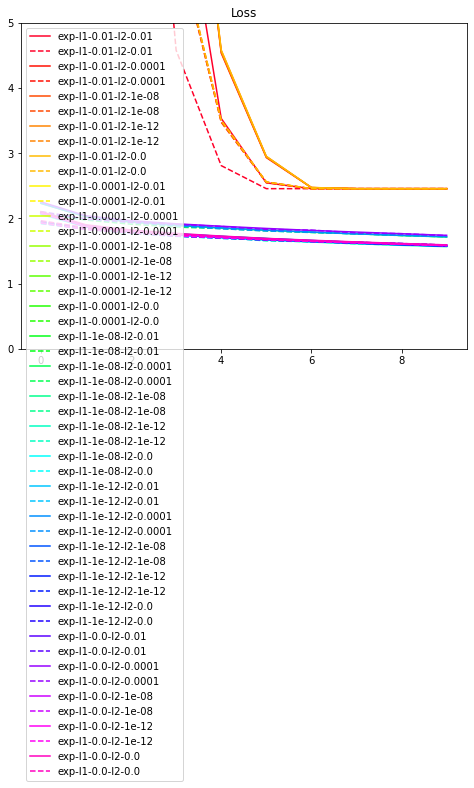

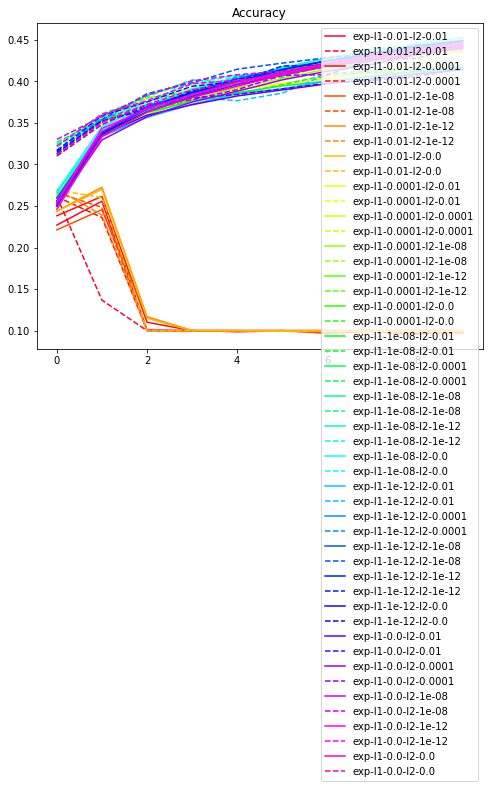

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()